# Pandas and Bokeh
Scotch whiskey for complexity and variety of flavors. Regions equate to distinct flavor profiles. <br>
#### Classify scotch whiskies 
based on flavor characteristics. <br>
<b> DataSet </b> - selection of scotch whiskies from several distilleries. Cluster into groups similar in flavor.<br>
 - 86 malt whiskies
 - scored between 0 - 4
 - 12 different taste categories
 - aggregated from 10 different tasters
 - taste categories: sweet, smoky, medicinal, spicy, etc
##### Pandas 
built on numpy. Arithmetic operations, summarize data, compute correlations, handle missing data. 
- Series - 1d array-like
- Dataframe - 2d array-like
- metadata

In [1]:
import pandas as pd

In [2]:
x = pd.Series([6,3,21,4,6])
x

0     6
1     3
2    21
3     4
4     6
dtype: int64

left side - index - default 0 and increasing

In [3]:
# define own index
x = pd.Series([6,3,8,6], index=["q","w","e","r"])
print (x["w"])
print (x[["r", "w"]])

3
r    6
w    3
dtype: int64


In [4]:
age = {"Amber": 30, "Kumani": 6, "Pam": 27, "Sam": 35}
x = pd.Series(age)
x

Amber     30
Kumani     6
Pam       27
Sam       35
dtype: int64

<b>Data Frame</b> - table-like data - row and column index <br>
Common way - from a dictionary <br>
value objects are lists or NumPy arrays of equal length

In [5]:
some_data = {'name' : ['Amber', 'Kumani', 'Pam', 'Sam'],
             'age' : [30, 6, 27,35],
             'ZIP' : ['02115', '02130', '67700', '00100']
    }
# name, age, ZIP keys
# values - keys
x = pd.DataFrame(some_data, columns=['name','age','ZIP'])
x # dataFrame object

,name,age,ZIP
0,Amber,30,02115
1,Kumani,6,02130
2,Pam,27,67700
3,Sam,35,00100


In [6]:
x['name']

0     Amber
1    Kumani
2       Pam
3       Sam
Name: name, dtype: object

In [7]:
x.name

0     Amber
1    Kumani
2       Pam
3       Sam
Name: name, dtype: object

In [8]:
x = pd.Series([6,3,8,6], index=["q","w","e","r"])
print (x)
print (x.index) 

q    6
w    3
e    8
r    6
dtype: int64
Index(['q', 'w', 'e', 'r'], dtype='object')


In [9]:
sorted(x.index)

['e', 'q', 'r', 'w']

In [10]:
x.reindex(sorted(x.index))

e    8
q    6
r    6
w    3
dtype: int64

add two Series objects together alignment happens by index. Same as numpy arrays. No match = NAN.

In [11]:
y = pd.Series([7,3,5,2], index=["e","q","r","t"])
y

e    7
q    3
r    5
t    2
dtype: int64

In [12]:
 x + y

e    15.0
q     9.0
r    11.0
t     NaN
w     NaN
dtype: float64

 ### Loading and Inspecting Data
 regions file - regiion whiskies produced
 whiskies file - all other data about whiskies

In [13]:
import numpy as np
import pandas as pd

In [14]:
whisky =pd.read_csv("whiskies.txt")
whisky["Regions"] = pd.read_csv("regions.txt")
whisky.head()
#first 5 rows

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Regions
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands


`iloc` method to index dataFrame by location

In [15]:
whisky.iloc[0:10]
# rows 0 - 10

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Regions
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands
5,6,ArranIsleOf,2,3,1,1,0,1,1,1,0,1,1,2,KA27 8HJ,194050,649950,Islands
6,7,Auchentoshan,0,2,0,0,0,1,1,0,2,2,3,3,G81 4SJ,247670,672610,Lowlands
7,8,Auchroisk,2,3,1,0,0,2,1,2,2,2,2,1,\tAB55 3XS,340754,848623,Speyside
8,9,Aultmore,2,2,1,0,0,1,0,0,2,2,2,2,\tAB55 3QY,340754,848623,Speyside
9,10,Balblair,2,3,2,1,0,0,2,0,2,1,2,1,\tIV19 1LB,270820,885770,Highlands


In [16]:
whisky.iloc[5:10, 0:5]
# 5 - 10 rows
# 0 - 5 columns

,RowID,Distillery,Body,Sweetness,Smoky
5,6,ArranIsleOf,2,3,1
6,7,Auchentoshan,0,2,0
7,8,Auchroisk,2,3,1
8,9,Aultmore,2,2,1
9,10,Balblair,2,3,2


In [17]:
whisky.columns

Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', ' Latitude', ' Longitude', 'Regions'],
      dtype='object')

In [18]:
flavors = whisky.iloc[:, 2:14]
flavors.head()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1


### Exploring Correlation
Find about about correlation fo different flavor attributes <br>
Default <b> Pearson correlation </b> - estimated linear correlations in the data. x and y in the Pearson correlation coefficient approaches plus 1 as the points in the xy scatter plot approach a straight upward line<br>
Large positive correlation coefficient indicates that the two flavor attributes in question tend to either increase or decrease together. If one has a high score, the other on average also has a high score

In [19]:
corr_flavors = pd.DataFrame.corr(flavors)
corr_flavors

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
Body,1.000000,-0.136518,0.524032,0.354050,0.168718,0.082031,0.188500,0.408576,0.126323,-0.116859,-0.013205,-0.461203
Sweetness,-0.136518,1.000000,-0.405897,-0.392017,-0.147871,0.132558,-0.054200,0.115727,-0.032493,-0.001516,0.019820,0.144987
Smoky,0.524032,-0.405897,1.000000,0.686071,0.365501,-0.195318,0.231745,-0.028190,-0.023132,-0.192875,-0.312970,-0.431663
Medicinal,0.354050,-0.392017,0.686071,1.000000,0.425106,-0.396629,0.044903,-0.202651,-0.113671,-0.258959,-0.330975,-0.511323
Tobacco,0.168718,-0.147871,0.365501,0.425106,1.000000,-0.275490,0.054068,0.009097,-0.117717,-0.059347,-0.235145,-0.212375
Honey,0.082031,0.132558,-0.195318,-0.396629,-0.275490,1.000000,0.139563,0.362021,0.188492,0.310184,0.108822,0.183029
Spicy,0.188500,-0.054200,0.231745,0.044903,0.054068,0.139563,1.000000,0.092704,-0.042856,0.036303,0.144714,0.034663
Winey,0.408576,0.115727,-0.028190,-0.202651,0.009097,0.362021,0.092704,1.000000,0.198467,0.112368,0.090694,-0.126932
Nutty,0.126323,-0.032493,-0.023132,-0.113671,-0.117717,0.188492,-0.042856,0.198467,1.000000,0.066157,0.071765,0.018302
Malty,-0.116859,-0.001516,-0.192875,-0.258959,-0.059347,0.310184,0.036303,0.112368,0.066157,1.000000,0.207288,0.106309


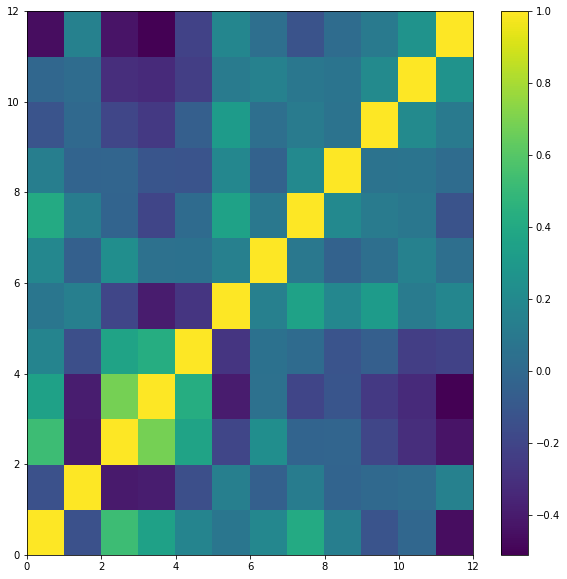

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
plt.pcolor(corr_flavors)
plt.colorbar()

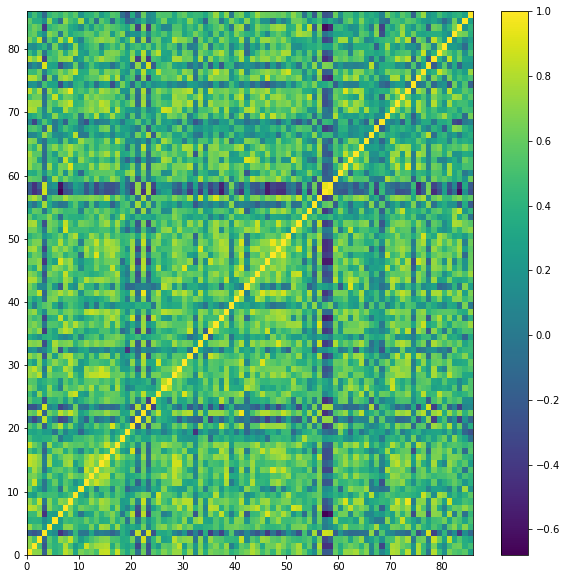

In [21]:
corr_whisky = pd.DataFrame.corr(flavors.transpose())
plt.figure(figsize=(10,10))
plt.pcolor(corr_whisky)
plt.axis("tight")
plt.colorbar()
# 90x90 correlation matrix 

### Clustering Whiskies by Flavor Profile
from SciKitLearn - spectral co-clustering - method for finding clusters of objects by the similarity of their attributes<br>
- left - words 
- right - documents
one to many join right to left. Find clusters and set of documents that go togehter. Simultaneously find both clusters of words and clusters of documents. <br>
<b> Adjacency matric </b> rows correspond to words, columns correspond to documents. Any given element of the matric represents the number of times a given word appears in the given document. Take matrix and manipulate. <br>
- Eigen values
- Eigenvectors
Find clusters of whiskeys in correlation matrix of whiskey flavors - re-roders the rown and columns of the correlation matrix to see blocks corresponding to groups of whiskeys more clearly. <br>
6 regions = 6 clustering blocks

In [24]:
from sklearn.cluster.bicluster import SpectralCoclustering
model=SpectralCoclustering(n_clusters=6, random_state=0)
model.fit(corr_whisky)
model.rows_

array([[False, False, False, False, False,  True, False, False, False,
        False, False,  True, False,  True, False, False,  True, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True,  True, False,
        False, False,  True, False,  True, False, False, False, False,
         True, False,  True,  True, False, False, False, False, False,
         True, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False,  True, False, False,
         True, False, False, False, False, False, False, False,  True,
        False, False,  True, False,  True],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  Tru

Number of row clusters times number of rows in the data matrix - correlation matrix. true or false. Each row identifies a cluster ranging from 0 to 5. Each column identifies a row in the correlation matrix ranging from 0 to 85. Sum all the columns in the array - find out how many observations belong to each cluster. 

In [25]:
np.sum(model.rows_,axis=1)
# how many whiskeys belong to a cluster 0, 1 ,2 etc

array([20,  5, 19, 17,  6, 19])

In [26]:
np.sum(model.rows_,axis=0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
model.row_labels_

array([5, 2, 3, 4, 5, 0, 3, 2, 5, 3, 2, 0, 5, 0, 5, 5, 0, 5, 0, 1, 3, 4, 3,
       4, 3, 3, 2, 2, 3, 2, 3, 5, 0, 0, 0, 5, 2, 3, 0, 1, 0, 3, 2, 2, 2, 0,
       5, 0, 0, 3, 3, 2, 2, 2, 0, 1, 5, 4, 4, 0, 3, 5, 2, 5, 5, 2, 1, 5, 1,
       0, 2, 5, 0, 5, 2, 5, 3, 4, 5, 3, 0, 3, 2, 0, 2, 0])

observation 0 = 5, observation 1 = 2, observation 2 = 3 <br>
all are between 0 - 5 because defined 6 clusters

### Comparing Correlation Matricies
draw clusters as groups. Rename the indicies to match the sorting. Extract the group lables from the model and append them to the whisky table. Specify their index explicitly. Reorder the rown in increasing order by group labels. Group lables discovered using spectral co-clustering. Reset the index of DataFrame. Recalculate the correlation matrix. Turn the correlation matrix into a NumPy array. 

(0.0, 86.0, 0.0, 86.0)

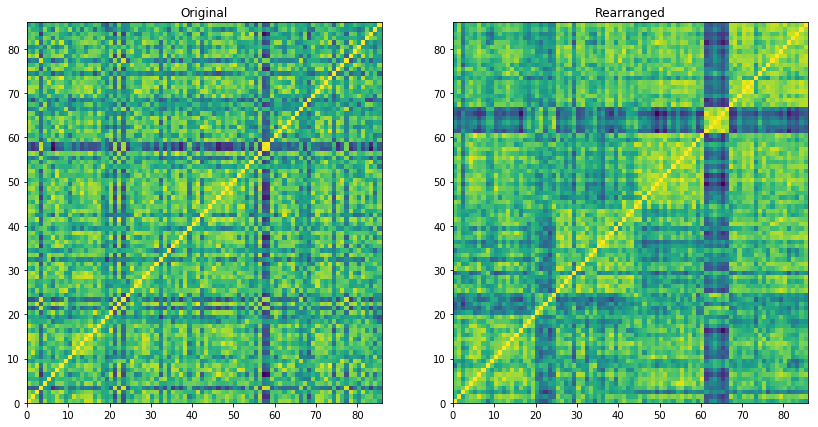

In [28]:
whisky['Group'] = pd.Series(model.row_labels_, index=whisky.index)
# reorder rows in increasing order by group lables
whisky = whisky.ix[np.argsort(model.row_labels_)]
# reset the index
whisky = whisky.reset_index(drop=True)
# recalculate correlation matrix 
correlations = pd.DataFrame.corr(whisky.iloc[:,2:14].transpose())
# into NumPy array
correlations = np.array(correlations)

plt.figure(figsize=(14,7))
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title("Original")
plt.axis("tight")
plt.subplot(122)
plt.pcolor(correlations)
plt.title("Rearranged")
plt.axis("tight")

left = original correlation matrix - 86 whiskies and correlation coefficients are computed over their flavor profiles <br>
right = same thing except rows and columns have been reordered - t oidentify six different groupd of whiskies. should be six blocks of whiskies

In [29]:
data_samp = pd.Series([1,2,3,4])
data_samp = data_samp.iloc[[3,0,1,2]]
data_samp[0]

1

### Bokeh

In [34]:
"""EXAMPLE"""
# First, we import a tool to allow text to pop up on a plot when the cursor
# hovers over it.  Also, we import a data structure used to store arguments
# of what to plot in Bokeh.  Finally, we will use numpy for this section as well!

from bokeh.models import HoverTool, ColumnDataSource
import numpy as np
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

# Let's plot a simple 5x5 grid of squares, alternating in color as red and blue.

plot_values = [1,2,3,4,5]
plot_colors = ["red", "blue"]

# How do we tell Bokeh to plot each point in a grid?  Let's use a function that
# finds each combination of values from 1-5.
from itertools import product

grid = list(product(plot_values, plot_values))
print(grid)

# The first value is the x coordinate, and the second value is the y coordinate.
# Let's store these in separate lists.

xs, ys = zip(*grid)
print(xs)
print(ys)

# Now we will make a list of colors, alternating between red and blue.

colors = [plot_colors[i%2] for i in range(len(grid))]
print(colors)

# Finally, let's determine the strength of transparency (alpha) for each point,
# where 0 is completely transparent.

alphas = np.linspace(0, 1, len(grid))

# Bokeh likes each of these to be stored in a special dataframe, called
# ColumnDataSource.  Let's store our coordinates, colors, and alpha values.

source = ColumnDataSource(
    data={
        "x": xs,
        "y": ys,
        "colors": colors,
        "alphas": alphas,
    }
)
# We are ready to make our interactive Bokeh plot!

output_file("Basic_Example.html", title="Basic Example")
fig = figure(tools="resize, hover, save")
fig.rect("x", "y", 0.9, 0.9, source=source, color="colors",alpha="alphas")
hover = fig.select(dict(type=HoverTool))
hover.tooltips = {
    "Value": "@x, @y",
    }
output_notebook()
show(fig)

INFO:bokeh.core.state:Session output file 'Basic_Example.html' already exists, will be overwritten.


[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]
(1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5)
(1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5)
['red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red']


Loading BokehJS ...

In [36]:
# whisky regions
cluster_colors = ["red", "orange", "green", "blue", "purple", "gray"]
regions = ["Speyside", "Highlands", "Lowlands", "Islands", "Campbelltown", "Islay"]
region_colors = dict(zip(regions, cluster_colors))
region_colors

{'Campbelltown': 'purple',
 'Highlands': 'orange',
 'Islands': 'blue',
 'Islay': 'gray',
 'Lowlands': 'green',
 'Speyside': 'red'}

In [47]:
distilleries = list(whisky.Distillery)
correlation_colors = []
for i in range(len(distilleries)):
    for j in range(len(distilleries)):
        if correlations[i,j] < 0.7:   # if low correlation,
            correlation_colors.append('white')         # just use white.
        else:                                          # otherwise,
            if whisky.Group[i]==whisky.Group[j]: # if the groups match,
                correlation_colors.append(cluster_colors[whisky.Group[i]]) # color them by their mutual group.
            else:                                      # otherwise
                correlation_colors.append('lightgray') # color them lightgray.

In [50]:
source = ColumnDataSource(
    data = {
        "x": np.repeat(distilleries,len(distilleries)),
        "y": list(distilleries)*len(distilleries),
        "colors": correlation_colors,
        "alphas": correlations.flatten(),
        "correlations": correlations.flatten(),
    }
)

output_file("Whisky Correlations.html", title="Whisky Correlations")
fig = figure(title="Whisky Correlations",
    x_axis_location="above", tools="resize,hover,save",
    x_range=list(reversed(distilleries)), y_range=distilleries)
fig.grid.grid_line_color = None
fig.axis.axis_line_color = None
fig.axis.major_tick_line_color = None
fig.axis.major_label_text_font_size = "5pt"
fig.xaxis.major_label_orientation = np.pi / 3

fig.rect('x', 'y', .9, .9, source=source,
     color='colors', alpha='alphas')
hover = fig.select(dict(type=HoverTool))
hover.tooltips = {
    "Whiskies": "@x, @y",
    "Correlation": "@correlations",
}
show(fig)

In [52]:
"""EXAMPLE"""
points = [(0,0), (1,2), (3,1)]
xs, ys = zip(*points)
colors = ["red", "blue", "green"]

output_file("Spatial_Example.html", title="Regional Example")
location_source = ColumnDataSource(
    data={
        "x": xs,
        "y": ys,
        "colors": colors,
    }
)

fig = figure(title = "Title",
    x_axis_location = "above", tools="resize, hover, save")
fig.plot_width  = 300
fig.plot_height = 380
fig.circle("x", "y", size=10, source=location_source,
     color='colors', line_color = None)

hover = fig.select(dict(type = HoverTool))
hover.tooltips = {
    "Location": "(@x, @y)"
}
show(fig)

In [64]:
def location_plot(title, colors):
    output_file(title+".html")
    location_source = ColumnDataSource(
        data={
            "x": whisky[" Latitude"],
            "y": whisky[" Longitude"],
            "colors": colors,
            "regions": whisky.Regions, #Pandas column containing the regional group membership for each distillery
            "distilleries": whisky.Distillery
        }
    )

    fig = figure(title = title,
        x_axis_location = "above", tools="resize, hover, save")
    fig.plot_width  = 400
    fig.plot_height = 500
    fig.circle("x", "y", size=9, source=location_source,
         color='colors', line_color = None)
    fig.xaxis.major_label_orientation = np.pi / 3
    hover = fig.select(dict(type = HoverTool))
    hover.tooltips = {
        "Distillery": "@distilleries",
        "Location": "(@x, @y)"
    }
    show(fig)

region_cols = [region_colors[i] for  i in list(whisky.Regions)]
location_plot("Whisky Locations and Regions", region_cols)

INFO:bokeh.core.state:Session output file 'Whisky Locations and Regions.html' already exists, will be overwritten.


In [60]:
region_colors

{'Campbelltown': 'purple',
 'Highlands': 'orange',
 'Islands': 'blue',
 'Islay': 'gray',
 'Lowlands': 'green',
 'Speyside': 'red'}

In [65]:
region_cols = [region_colors[i] for  i in list(whisky.Regions)]
classification_cols = [cluster_colors[i] for i in list(whisky.Group)]

location_plot("Whisky Locations and Regions", region_cols)
location_plot("Whisky Locations and Groups", classification_cols)

INFO:bokeh.core.state:Session output file 'Whisky Locations and Regions.html' already exists, will be overwritten.
